# Countries of the World EDA - Assignment 1

## Abstract

In this assignment, our purpose is to build the model which can predict the countries' GDP, so we have to analyze the training data in the first place, also known as Exploratory Data Analysis (EDA). In the follow content, we will carefully investigate the data, countriesofworld.csv, given by US government. We will, first of all, take a glance at the data table and also the statistics, mean, max, min and so on. Then, the relationship between several kinds of features will be compared and shown for the deeper understanding. 

## Experiment

### Overview

We start with importing every kinds of libraries we may use for the later experiments.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Next step is to load the dataset by using pandas library.

In [3]:
df = pd.read_csv('countriesOfTheWorld.csv', decimal = ',')

After we loading the dataset, we can quickly peek the table, for instance showing five countries (observations) below. It seems it is previously sorted by alpha order (first five are 'A', last five are 'W', 'Y', 'Z').

In [6]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


The above shows the data by row, now we take a look into column data, on the other words, the statistics, maximum, minimum, mean, standard, and so on, between features in every countries.

In [7]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Then, because we want to predict GDP, so it is worthy to know the order of countries by GDP. We sort them by GDP descending and showing the top twenty countries. As the table showing below, the highest GDP country is Luxembourg, then is Norway. The lowest GDP countries are also shown. We can see there is a NaN value in the GDP of Western Sahara. It will cause the inaccuracy of our model and it will be eliminated later on.

In [8]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


In [9]:
top_gdp_countries[['GDP ($ per capita)','Country']].tail(20)

,GDP ($ per capita),Country
151,800.0,Niger
225,800.0,Zambia
224,800.0,Yemen
222,800.0,West Bank
87,800.0,Guinea-Bissau
108,800.0,Kiribati
44,700.0,Comoros
45,700.0,"Congo, Dem. Rep."
46,700.0,"Congo, Repub. of the"
63,700.0,Eritrea


For now, we can just keep focusing on the GDP value. The histogram is shown below.

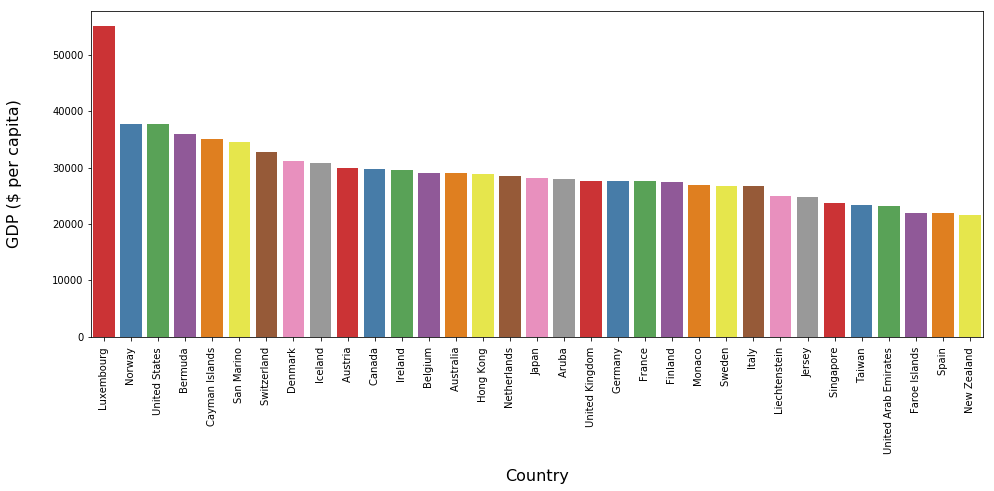

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

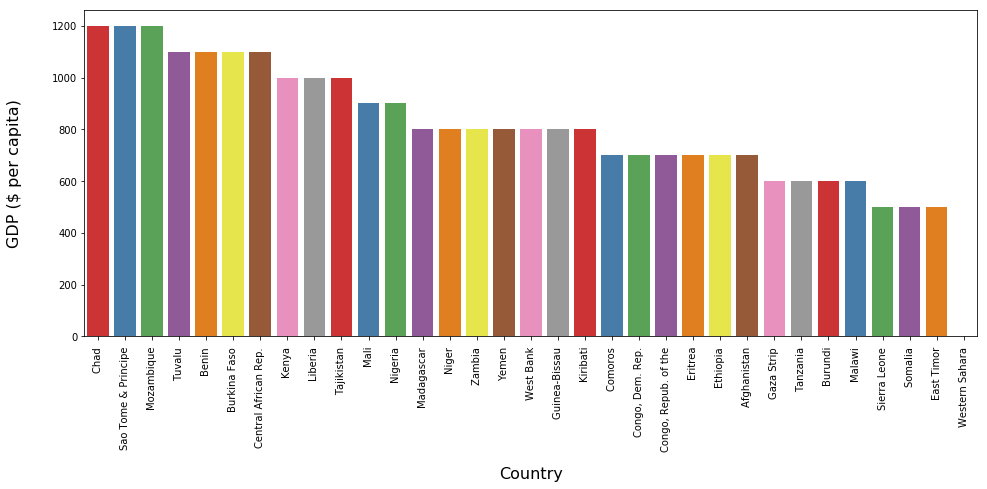

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### Finding NaN in data

We find out that there is value of NaN in our data. We can check how many NaN in our data first to determind how these NaN will influence our model. In the table below, we find out that there are most NaN in climate feature, which is 9.69%, and less in GDP feature. Finally, there are 110 NaN in our data totally, it may cause the inaccuracy of our training model and we will eliminated these NaN value in the next section.

In [42]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


In [43]:
df.isnull().sum().sum()

110

### Eliminate the NaN

In [46]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]